In [1]:
import pandas as pd

msg = pd.read_csv("../../linux/git_messages.log", sep="\u0012", encoding='latin-1', header=None, names=['timestamp', 'text'])
msg['timestamp'] = pd.to_datetime(msg['timestamp'], unit='s')
# determining the first real commit timestamp
first_commit_timestamp = msg.iloc[-1]['timestamp']

# determining the last sensible commit timestamp
last_commit_timestamp = pd.to_datetime('today')

# filtering out wrong timestamps
msg = msg[
    (msg['timestamp'] >= first_commit_timestamp) &
    (msg['timestamp'] <= last_commit_timestamp)]

msg['text'] = msg['text'].apply(str)

msg.head()

,timestamp,text
0,2017-08-13 23:01:32,Linux 4.13-rc5
1,2017-08-02 12:33:05,mtd: blkdevs: Fix mtd block write failure
2,2017-08-12 03:34:45,MD: not clear ->safemode for external metadata...
3,2017-08-05 08:59:14,pnfs/blocklayout: require 64-bit sector_t
4,2017-08-09 21:59:10,selftests: timers: freq-step: fix compile error


In [2]:
stopwords = ["add", "use", "fix", "patch", "make", "support", "update"]
msg['text'] = msg['text'].apply(lambda x: " ".join([item for item in x.split(" ") if item.lower() not in stopwords]))
msg.head()

,timestamp,text
0,2017-08-13 23:01:32,Linux 4.13-rc5
1,2017-08-02 12:33:05,mtd: blkdevs: mtd block write failure
2,2017-08-12 03:34:45,MD: not clear ->safemode for external metadata...
3,2017-08-05 08:59:14,pnfs/blocklayout: require 64-bit sector_t
4,2017-08-09 21:59:10,selftests: timers: freq-step: compile error


In [8]:
group_by_year = msg.groupby(pd.Grouper(key='timestamp', freq="AS")).apply(lambda x : " ".join(x.text.apply(str)))
group_by_year.head()

timestamp
2005-01-01    Linux-2.6.12-rc2 [PATCH] mmtimer build [PATCH]...
2006-01-01    sysctl: sure to terminate strings with a NUL [...
2007-01-01    sh: handle_BUG() compile error. Linux 2.6.20-r...
2008-01-01    ssb: 'ssb_pcihost_set_power_state' function b4...
2009-01-01    sched: put back some stack hog changes that we...
Freq: AS-JAN, dtype: object

In [9]:
%matplotlib inline

from wordcloud import WordCloud

w=300
h=800

generate_image = lambda text : WordCloud(width=w, height=h, margin=0, prefer_horizontal=0.5).generate(text)
images = group_by_year.apply(generate_image)
images

timestamp
2005-01-01    <wordcloud.wordcloud.WordCloud object at 0x000...
2006-01-01    <wordcloud.wordcloud.WordCloud object at 0x000...
2007-01-01    <wordcloud.wordcloud.WordCloud object at 0x000...
2008-01-01    <wordcloud.wordcloud.WordCloud object at 0x000...
2009-01-01    <wordcloud.wordcloud.WordCloud object at 0x000...
2010-01-01    <wordcloud.wordcloud.WordCloud object at 0x000...
2011-01-01    <wordcloud.wordcloud.WordCloud object at 0x000...
2012-01-01    <wordcloud.wordcloud.WordCloud object at 0x000...
2013-01-01    <wordcloud.wordcloud.WordCloud object at 0x000...
2014-01-01    <wordcloud.wordcloud.WordCloud object at 0x000...
2015-01-01    <wordcloud.wordcloud.WordCloud object at 0x000...
2016-01-01    <wordcloud.wordcloud.WordCloud object at 0x000...
2017-01-01    <wordcloud.wordcloud.WordCloud object at 0x000...
Freq: AS-JAN, dtype: object

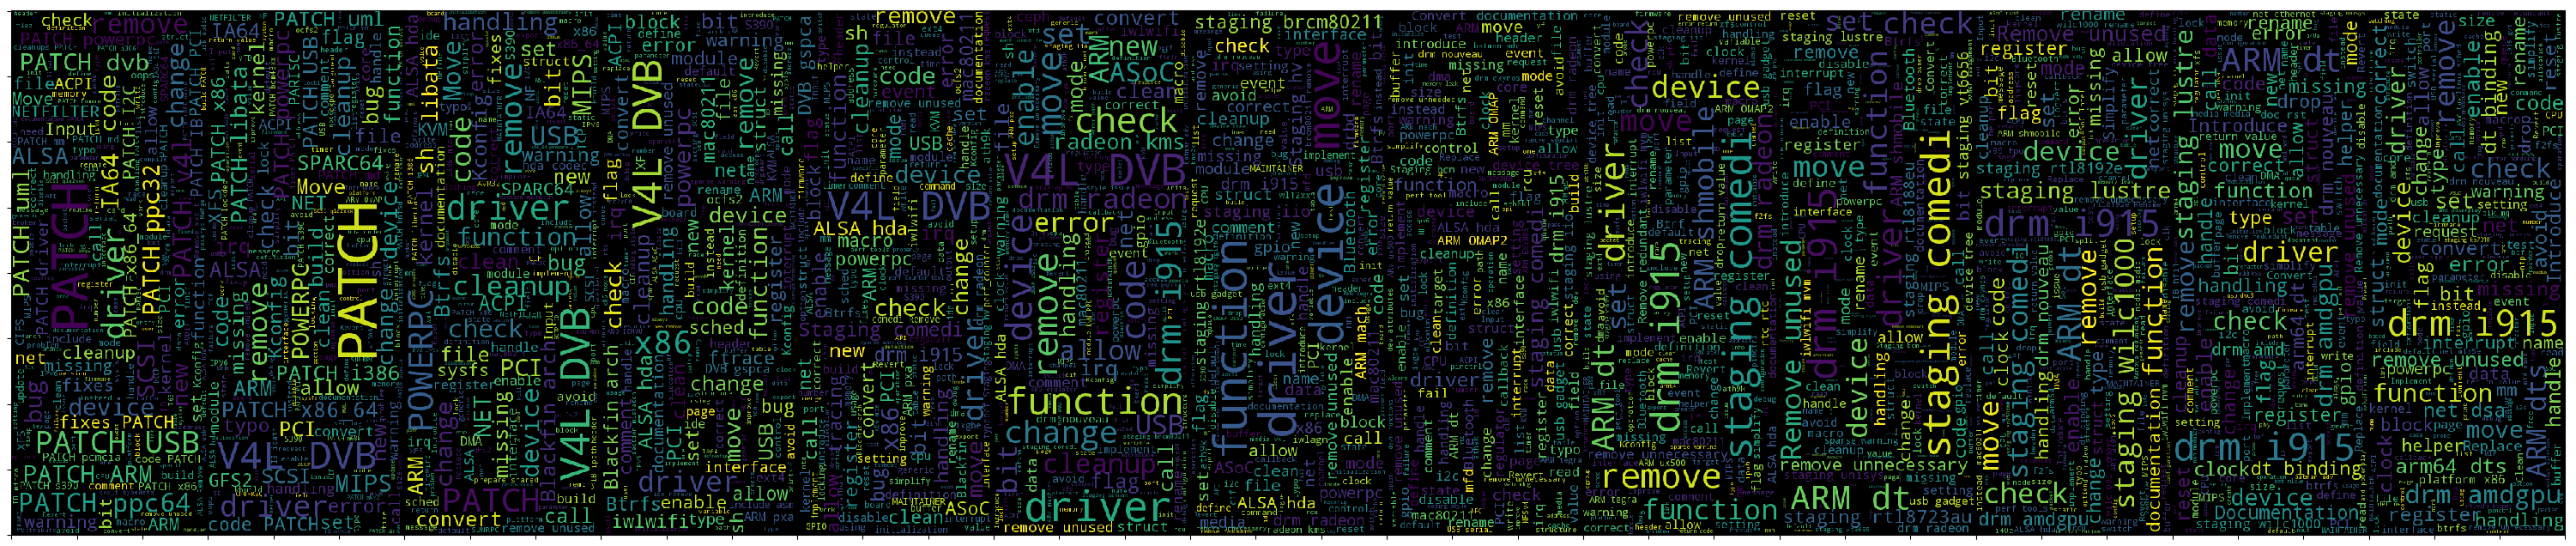

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

n = len(images)
my_dpi=96

#f, axarr = plt.subplots(1,n, figsize=(h/my_dpi, w*n/my_dpi), dpi=my_dpi)
f, axarr = plt.subplots(1,n, figsize=(40,80), dpi=my_dpi)
                 
    
for i, image in enumerate(images):
    a = axarr[i]
    a.imshow(image)
    a.set_xticklabels([])
    a.set_yticklabels([])

plt.subplots_adjust(wspace=0, hspace=0)